# Current version : 9.A (2025-04-22)

# Libraries and directory (always run)

In [1]:
### import necessary libraries
import anndata as ad
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
import scanpy as sc
import warnings

warnings.filterwarnings("ignore") 
sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 1 # errors (0), warnings (1), info (2), hints (3)
plt.rcParams["font.family"] = "Arial"
sns.set_style("white")

# Note that BANKSY itself is deterministic, here the seeds affect the umap clusters and leiden partition
seed = 1234
np.random.seed(seed)
random.seed(seed)

start_time = datetime.now()

def print_with_elapsed_time(message):
    elapsed_time = datetime.now() - start_time
    elapsed_seconds = elapsed_time.total_seconds()
    print(f"[{elapsed_seconds:.2f} seconds] {message}")

In [21]:
# print(f"geopandas version: {gpd.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"scanpy version: {sc.__version__}")

pandas version: 2.0.1
scanpy version: 1.11.1


In [3]:
### Directory where the data is stored

# dir = "/mnt/d/Xenium" #Ubuntu
dir = 'D:\\Xenium'
# dir = "/media/volume/data/spatial/hugo/data" #Ubuntu
# dir = "/media/volume/data/spatial/hugo/data/k5" #Ubuntu
# dir = '/media/volume/volume_spatial/hugo/data/test'
# dir = '/media/volume/volume_spatial/hugo/data'

dir_notebook = 'D:\\Jupyter_notebook/Xenium_jupyter_notebook'
# dir_notebook = '/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook'
# dir_notebook = '/media/volume/data/spatial/hugo/notebook'
# dir_notebook = '/media/volume/volume_spatial/hugo/notebook'


In [4]:
# # # # ### HC ###

# # # # ### make a list of samples and their ids to make the cell names unique
# # # # #samples = ["2505-1__20240404__003359", "2505-2__20240404__003359", "2670-1__20240404__003359", "3159-1__20240321__212855", "3160-1__20240321__212855", "3160-2__20240321__212855"]
# # # # #samples_ids = ["2505-1", "2505-2", "2670-1", "3159-1", "3160-1", "3160-2"]
# # # # #name_dir = 'run1-2'

# # # # # ### Run 1 resegmented
# # # # samples = ["2505-1_subsampled", "2505-2_subsampled", "2670-1_subsampled", 
# # # #    "3159-1_subsampled"
# # # #     , "3160-1_subsampled", "3160-2_subsampled"]
# # # # samples_ids = ["2505-1", "2505-2", "2670-1", 
# # # #               "3159-1", "3160-1", "3160-2"       ]
# # # # name_dir = 'run1-resegment'

# # # # # # #Run 3
# # # # # samples = ["3159-2__20240530__205547", "3159-3__20240530__205547", "3159-4__20240530__205547", "3161-1__20240530__205547", "3161-2__20240530__205547", "3161-3__20240530__205547"]
# # # # # samples_ids = ["3159-2", "3159-3", "3159-4", "3161-1", "3161-2", "3161-3"]
# # # # # name_dir = 'run3-all'

# # # # # Run 3 Habenula
# # # samples = ["3159-2__20240530__205547", "3161-1__20240530__205547"]
# # # samples_ids = ["3159-2", "3161-1"]
# # # name_dir = 'run3-Habenula'

# # # # # # # Run 3 LGN
# # # # samples = ["3159-3__20240530__205547", "3161-2__20240530__205547"]
# # # # samples_ids = ["3159-3","3161-2"]
# # # # name_dir = 'run3-LGN'

# # # # # #Run 3 SC
samples = ["3159-4","3161-3"]
samples_ids = ["3159-4", "3161-3"]
name_dir = 'run3-SC'

# # # # # samples = ["Xenium_Prime_Mouse_Brain_Coronal_FF_outs"]
# # # # # samples_ids = ['Xenium_Prime']
# # # # # name_dir = 'test-prime'

# # # # # # circa1
# # samples = ['circa1_ZT1','circa1_ZT5','circa1_ZT9','circa1_ZT13','circa1_ZT17','circa1_ZT21']
# # samples_ids = ['circa1-ZT1','circa1-ZT5','circa1-ZT9','circa1-ZT13','circa1-ZT17','circa1-ZT21',]
# # name_dir = 'circa1'

# # # ### circa2_
# samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21']
# samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',]
# name_dir = 'circa2'

# # ### circa3_
# samples = ['circa3-ZT01','circa3-ZT05','circa3-ZT09','circa3-ZT13','circa3-ZT17','circa3-ZT21']
# samples_ids = ['circa3-ZT01','circa3-ZT05','circa3-ZT09','circa3-ZT13','circa3-ZT17','circa3-ZT21',]
# name_dir = 'circa3'

# ### circa4-Salk
# samples = ['circa4-Salk-ZT01',
#            'circa4-Salk-ZT05','circa4-Salk-ZT09','circa4-Salk-ZT13','circa4-Salk-ZT17',
#            'circa4-Salk-ZT21',]
# samples_ids = ['circa4-Salk-ZT01',
#                'circa4-Salk-ZT05','circa4-Salk-ZT09','circa4-Salk-ZT13','circa4-Salk-ZT17',
#                'circa4-Salk-ZT21',]
# name_dir = 'circa4-Salk'


# circa4-IGM
# samples_ids = ['circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09'
#                    ,'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#                    ]
# samples = ['circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09'
#                    ,'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#                    ]
# name_dir = 'circa4-IGM'


# ### All 5k
# samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',
#             'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
#             'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#             'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
#             'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
#                 ]
# samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',
#             'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
#             'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#             'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
#             'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
#                ]
# name_dir = 'circa'


# # # # # # ### ALL SAMPLES
# samples = ["2505-1__20240404__003359", "2505-2__20240404__003359", "2670-1__20240404__003359", "3159-1__20240321__212855",
#            "3160-1__20240321__212855", "3160-2__20240321__212855","3159-2__20240530__205547", "3161-1__20240530__205547",
#           "3159-3__20240530__205547", "3161-2__20240530__205547","3159-4__20240530__205547","3161-3__20240530__205547"]

# samples_ids = ["2505-1", "2505-2", "2670-1", "3159-1",
#                "3160-1", "3160-2","3159-2", "3161-1",
#               "3159-3","3161-2","3159-4", "3161-3"
#               ]
# name_dir = 'all-samples'

# samples = ["CONTROLS","GCA"]
# samples_ids = ["CONTROLS","GCA"]
# name_dir = "Human-arteries"

# samples = ["Region1"
#         #    ,"Region2","Region3"
#            ]
# samples_ids = ["Region1"
#             #    ,"Region2","Region3"
#                ]
# name_dir = "MB_test"


# samples = ['S1_Region1']
# samples_ids = ["S1_Region1"]
# name_dir = 'march-test'

### SD1
samples = samples_ids = ["SD1-ZT01","SD1-ZT05","SD1-ZT09","SD1-ZT13","SD1-ZT17","SD1-ZT21",]
name_dir = 'SD1'


# Data pre-processing

## Import data from Xenium output

In [5]:
from module.xenium_preprocessing import import_xenium

adata = import_xenium(dir, dir_notebook, samples, samples_ids, name_dir)

Sample SD1-ZT01 done
Sample SD1-ZT05 done
Sample SD1-ZT09 done
Sample SD1-ZT13 done
Sample SD1-ZT17 done
Sample SD1-ZT21 done
Read all 6 samples


In [ ]:
# If you don't want to use MMC, skip to next section

# Stop here and run MapMyCell with the individual h5ad generated.
# Then put the .csv files obtained in the "Correlation_Mapping" folder, renamed as: {sample}_CorrelationMapping.csv


In [10]:
from module.xenium_preprocessing import mmc_merge
adata = mmc_merge(adata, dir_notebook, name_dir)

D:\Jupyter_notebook/Xenium_jupyter_notebook/Correlation_Mapping\SD1-ZT01_CorrelationMapping.csv
D:\Jupyter_notebook/Xenium_jupyter_notebook/Correlation_Mapping\SD1-ZT05_CorrelationMapping.csv
D:\Jupyter_notebook/Xenium_jupyter_notebook/Correlation_Mapping\SD1-ZT09_CorrelationMapping.csv
D:\Jupyter_notebook/Xenium_jupyter_notebook/Correlation_Mapping\SD1-ZT13_CorrelationMapping.csv
D:\Jupyter_notebook/Xenium_jupyter_notebook/Correlation_Mapping\SD1-ZT17_CorrelationMapping.csv
D:\Jupyter_notebook/Xenium_jupyter_notebook/Correlation_Mapping\SD1-ZT21_CorrelationMapping.csv


In [11]:
adata.obs['mmc:subclass_name'].isna().sum()

# Should be 0. If not zero, some cell are not annotated.
# Check the name of the CorrelationMapping files; if there is any missing, etc.


0

In [ ]:
if not os.path.exists(f"h5ad/{name_dir}/"):
   os.makedirs(f"h5ad/{name_dir}/")
adata.write(f"h5ad/{name_dir}/{name_dir}_MMC.h5ad.gz", compression='gzip')

In [ ]:
adata = sc.read_h5ad(f"h5ad/{name_dir}/{name_dir}_MMC.h5ad.gz")

## Compute quality metrics

In [6]:
sc.pp.calculate_qc_metrics(adata,  percent_top=(10, 20, 50, 150), inplace=True)

In [7]:
cprobes = (adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100)
cwords = (adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.0015915062049914888
Negative decoding count % : 0.008441698473721209


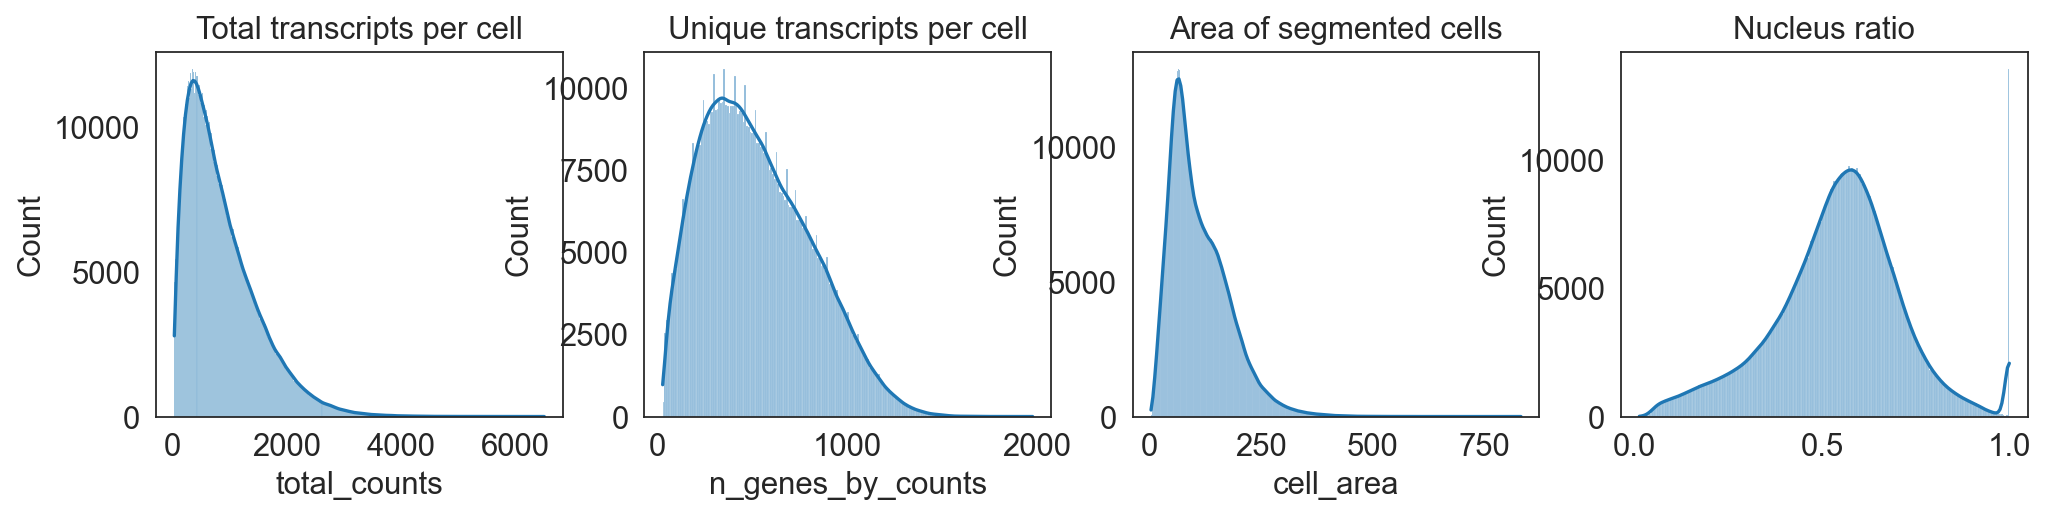

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))

axs[0].set_title("Total transcripts per cell")
sns.histplot(adata.obs["total_counts"],kde=True,ax=axs[0])

axs[1].set_title("Unique transcripts per cell")
sns.histplot(adata.obs["n_genes_by_counts"],kde=True,ax=axs[1])

axs[2].set_title("Area of segmented cells")
sns.histplot(adata.obs["cell_area"], kde=True, ax=axs[2])

axs[3].set_title("Nucleus ratio")
sns.histplot(adata.obs["nucleus_area"] / adata.obs["cell_area"], kde=True,ax=axs[3])

if not os.path.exists(f"{dir_notebook}/plot/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/plot/{name_dir}/")
plt.savefig(f"{dir_notebook}/plot/{name_dir}/{name_dir}_quality-metrics.svg")

## Normalize, PCA, UMAP

In [9]:
### Normalize, log1p, scale, PCA, and UMAP
start_time = datetime.now()
print_with_elapsed_time(f"Start")
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
print_with_elapsed_time(f"Normalize done")
sc.pp.log1p(adata)
print_with_elapsed_time(f"log1p done")

[0.00 seconds] Start
[2.79 seconds] Normalize done
[5.76 seconds] log1p done


In [13]:
if not os.path.exists(f"{dir_notebook}/h5ad/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/h5ad/{name_dir}/")
adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_norm.h5ad.gz", compression='gzip')

In [18]:
import scanpy.external as sce

start_time = datetime.now()
sc.pp.pca(adata)
print_with_elapsed_time(f"pca done")

adata.obs['run'] = adata.obs_names.map(lambda name: name.split('-')[0]) ### If multiple runs combined in one dataset. Adapat separation sign to the actual name

if adata.obs['run'].nunique() > 1:
    sce.pp.harmony_integrate(adata, key = 'run', basis = f"X_pca",  adjusted_basis = f"X_pca") ### Will overwrite original pca. Change "adjusted_basis" name to save both.
    print_with_elapsed_time(f"Harmony done")

sc.pp.neighbors(adata)
print_with_elapsed_time(f"neighbors done")
sc.tl.umap(adata, min_dist = 1)
print_with_elapsed_time(f"umap done")

[187.54 seconds] neighbors done
[1510.14 seconds] umap done


In [19]:
sc.tl.leiden(adata, resolution = 1) ### Use a high resolution to obtain more clusters. They can be adjusted/merged/subclustered later

In [20]:
if not os.path.exists(f"{dir_notebook}/h5ad/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/h5ad/{name_dir}/")
adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_clusters.h5ad.gz", compression='gzip')

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_clusters.h5ad.gz")

## Create a normalised datamatrix

In [22]:
# Create a normalised datamatrix for saving to disk as a csv file - rows are cells, columns are genes
df = pd.DataFrame(data=adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
df.shape

from module.xenium_preprocessing import add_annotations

df = add_annotations(adata, df)

### Extract normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
# df.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_normalized_counts.csv.gz",
#          compression={'method': 'gzip'})
df.to_parquet(f"{dir_notebook}/csv/{name_dir}/{name_dir}_normalized_counts.parquet")
# adata.obs.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_norm.csv")

# End of this notebook

Next step : clusters annotation

[v9B_Xenium_annotation_n_subsclustering](./v9B_Xenium_annotation_n_subsclustering.ipynb)